# CENSUS_INCOME_PROJECT

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Project Description:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.A single cell estimate of the population 16+ for each state.

2.Controls for Hispanic Origin by age and sex.

3.Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


Importing Dataset:

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Exploratory Data Analysis:

In [6]:
df.shape

(32560, 15)

There  are 32560 rows and 15 columns present in the dataset.

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

These are the columns present in the dataset.

In [3]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Length: 32560, dtype: bool

In [3]:
df.duplicated().sum()

24

There are 24 duplicate rows present in the dataset.

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

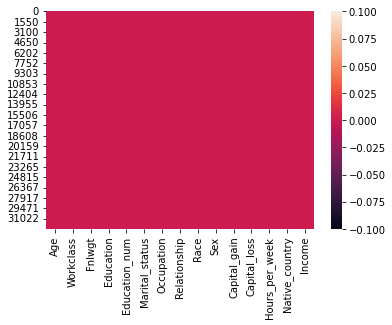

In [7]:
#Let's check null values using heatmap
sns.heatmap(df.isnull())

In [4]:
#Dropping the duplicate rows present in the dataset.
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated().sum()

0

Now, we deleted the duplicate rows present in the dataset.

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

There are two types of data i.e., int64 and object present in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


This gives the brief information about the name of the columns, Non-null count , data types and its memory usage of the dataset.

In [14]:
df["Income"].nunique()

2

There are two unique values present in this column.

In [6]:
for i in df.columns:
    print(df[i].value_counts())

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int6

These are the value counts of all the columns present in the dataset.In Workclass column, 1836 column contains"?" and in Occupation column,1843 values contain "?" and in Native_country column,582 values contain "?".

In [7]:
df["Income"].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

In [8]:
df["Workclass"].nunique()

9

In [31]:
df["Workclass"].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [9]:
df.replace(' ?', np.nan, inplace=True)

In [10]:
df["Workclass"].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [11]:
df["Occupation"].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [13]:
df["Native_country"].value_counts()

 United-States                 29152
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


Now there are nan values which are replaced by "?" values present in the dataset.

<AxesSubplot:>

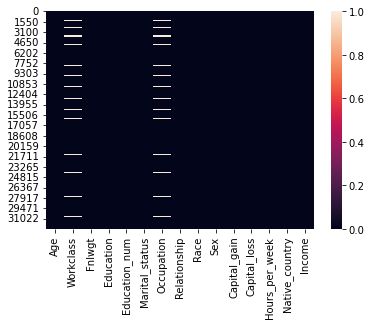

In [49]:
#Let's check the null values using heatmap.
sns.heatmap(df.isnull())

Now we replaced the "?" values with nan values in the dataset.Now let us handle the nan values.

In [12]:
df["Workclass"]=df["Workclass"].fillna(method="ffill")
df["Occupation"]=df["Occupation"].fillna(method="ffill")
df["Native_country"]=df["Native_country"].fillna(method="ffill")

In [13]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

we can observe that there ae no null values,we replaced "?" with nan and filled null values by using method "ffill".

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [53]:
df["Workclass"].value_counts()

 Private             24072
 Self-emp-not-inc     2686
 Local-gov            2204
 State-gov            1373
 Self-emp-inc         1177
 Federal-gov          1002
 Without-pay            15
 Never-worked            7
Name: Workclass, dtype: int64

In [54]:
df["Workclass"].nunique()

8

In [55]:
df["Occupation"].nunique()

14

In [56]:
df["Occupation"].value_counts()

 Prof-specialty       4383
 Craft-repair         4358
 Exec-managerial      4315
 Adm-clerical         3979
 Sales                3863
 Other-service        3467
 Machine-op-inspct    2132
 Transport-moving     1703
 Handlers-cleaners    1470
 Farming-fishing      1036
 Tech-support          980
 Protective-serv       683
 Priv-house-serv       157
 Armed-Forces           10
Name: Occupation, dtype: int64

In [57]:
df["Native_country"].value_counts()

 United-States                 29675
 Mexico                          653
 Philippines                     200
 Germany                         141
 Canada                          124
 Puerto-Rico                     118
 El-Salvador                     109
 India                           101
 Cuba                             97
 England                          93
 Jamaica                          83
 South                            80
 China                            77
 Dominican-Republic               74
 Italy                            73
 Vietnam                          72
 Guatemala                        64
 Japan                            63
 Columbia                         61
 Poland                           60
 Taiwan                           51
 Haiti                            45
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           30
 

In [58]:
df["Native_country"].nunique()

41

In [18]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [19]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


This gives the stastical summary of numerical columns.The counts of all the columns are same which means there are no missing values in the dataset.The summary of the dataset looks perfect since there is no negative/invalid values present.

The mean is greater than the median in Age,Fnlwgt, Education_num,Capital_gain, Capital_loss, Hours_per_week columns which means the data is skewed to right in these columns.

By summarizing the data we can observe there is a huge differences between 75% and max,hence there are outliers present in the data.

We can also notice that the standard deviation, minimum value and 25% percentile values from this describe method.

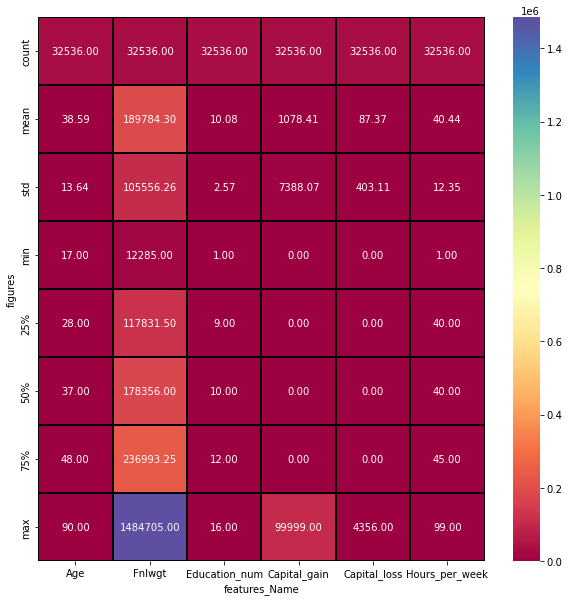

In [20]:
#let us visualize by using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.describe(),annot=True,linewidth=0.2,linecolor="black",fmt="0.2f",cmap="Spectral")
plt.ylabel("figures")
plt.xlabel("features_Name")
plt.show()

Data Visualization:

Univariate Analysis:

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


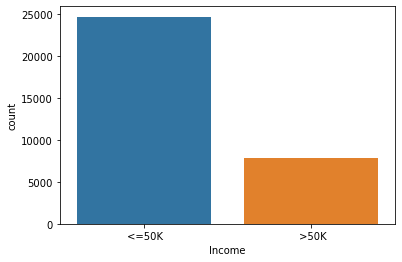

In [21]:
#Let's visualize the count of  Income column.
sns.countplot(x="Income",data=df)
print(df["Income"].value_counts())

The persons with Income <=50k is more compared to the persons with Income >50k.

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


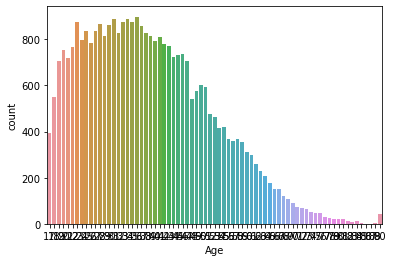

In [22]:
#Let's visualize the count of  Age column.
sns.countplot(x="Age",data=df)
print(df["Age"].value_counts())

The person age with 36 is more compared to others.

 Private             24072
 Self-emp-not-inc     2686
 Local-gov            2204
 State-gov            1373
 Self-emp-inc         1177
 Federal-gov          1002
 Without-pay            15
 Never-worked            7
Name: Workclass, dtype: int64


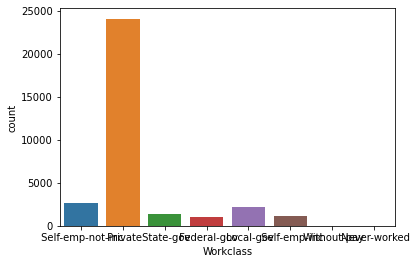

In [23]:
#Let's visualize the count of  Workclass column.
sns.countplot(x="Workclass",data=df)
print(df["Workclass"].value_counts())

The private type Workclass is more compared to others.

123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


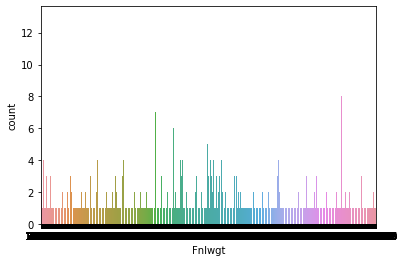

In [24]:
#Let's visualize the count of  Fnlwgt column.
sns.countplot(x="Fnlwgt",data=df)
print(df["Fnlwgt"].value_counts())

The Fnlwgt with 123011 is more compared to others

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


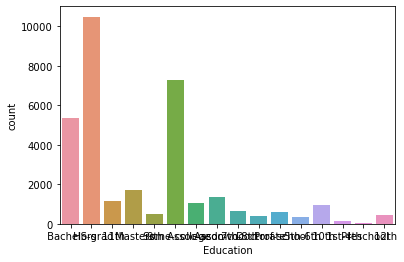

In [25]:
#Let's visualize the count of  Education column.
sns.countplot(x="Education",data=df)
print(df["Education"].value_counts())

The persons with Hs-grad Education is more compared to others.

9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64


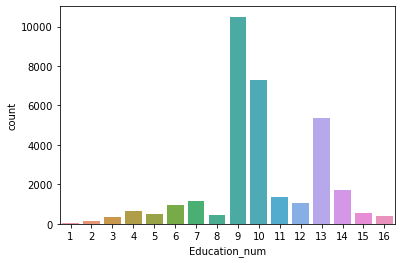

In [26]:
#Let's visualize the count of  Education_num column.
sns.countplot(x="Education_num",data=df)
print(df["Education_num"].value_counts())

The Education_num 9 is more compared to others.

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


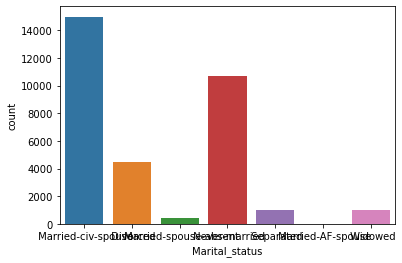

In [27]:
#Let's visualize the count of  Marital_status column.
sns.countplot(x="Marital_status",data=df)
print(df["Marital_status"].value_counts())

The persons with Married_civ_spouse category is more.

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


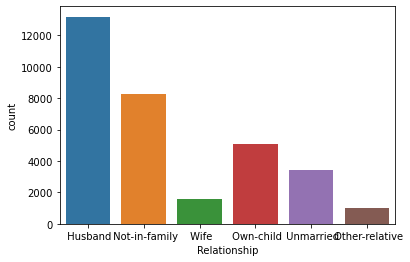

In [28]:
#Let's visualize the count of  Relationship column.
sns.countplot(x="Relationship",data=df)
print(df["Relationship"].value_counts())

The persons Relationship is with Husband category is more compared to others.

 Prof-specialty       4383
 Craft-repair         4358
 Exec-managerial      4315
 Adm-clerical         3979
 Sales                3863
 Other-service        3467
 Machine-op-inspct    2132
 Transport-moving     1703
 Handlers-cleaners    1470
 Farming-fishing      1036
 Tech-support          980
 Protective-serv       683
 Priv-house-serv       157
 Armed-Forces           10
Name: Occupation, dtype: int64


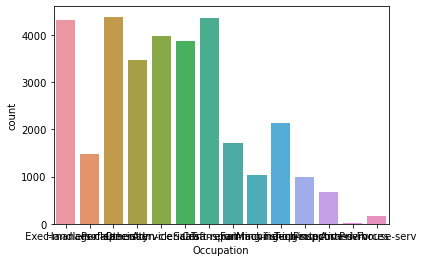

In [29]:
#Let's visualize the count of  Occupation column.
sns.countplot(x="Occupation",data=df)
print(df["Occupation"].value_counts())

The Prof_speciality category is more compared to others.

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


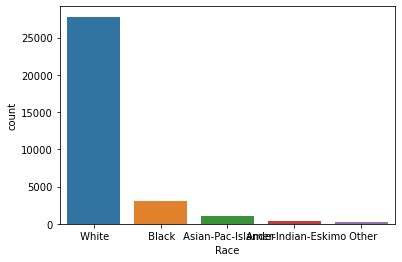

In [30]:
#Let's visualize the count of  Race column.
sns.countplot(x="Race",data=df)
print(df["Race"].value_counts())

The Race with White category is more compared to others.

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64


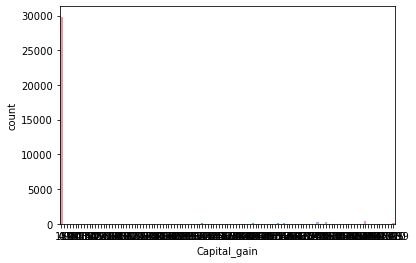

In [31]:
#Let's visualize the count of  Capital_gain column.
sns.countplot(x="Capital_gain",data=df)
print(df["Capital_gain"].value_counts())

The Capital_gain with 0 category is more.

0       31017
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64


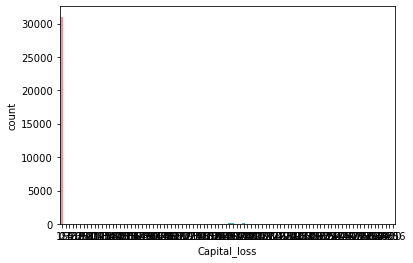

In [32]:
#Let's visualize the count of  Capital_loss column.
sns.countplot(x="Capital_loss",data=df)
print(df["Capital_loss"].value_counts())

The Capital_loss with 0 category is more.

40    15203
50     2817
45     1823
60     1475
35     1296
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64


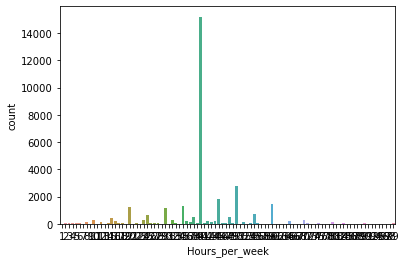

In [33]:
#Let's visualize the count of  Hours_per_week column.
sns.countplot(x="Hours_per_week",data=df)
print(df["Hours_per_week"].value_counts())

40 Hours_per_week  category is more compared to others.

 United-States                 29675
 Mexico                          653
 Philippines                     200
 Germany                         141
 Canada                          124
 Puerto-Rico                     118
 El-Salvador                     109
 India                           101
 Cuba                             97
 England                          93
 Jamaica                          83
 South                            80
 China                            77
 Dominican-Republic               74
 Italy                            73
 Vietnam                          72
 Guatemala                        64
 Japan                            63
 Columbia                         61
 Poland                           60
 Taiwan                           51
 Haiti                            45
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           30
 

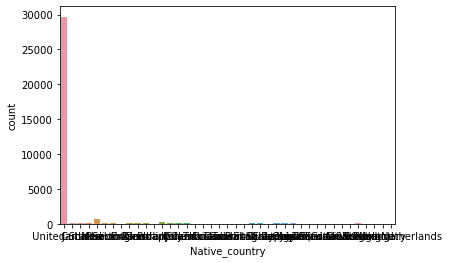

In [34]:
#Let's visualize the count of  Native_country column.
sns.countplot(x="Native_country",data=df)
print(df["Native_country"].value_counts())

The persons with Native_country United_states category is more compared to others.

 Male      21774
 Female    10762
Name: Sex, dtype: int64


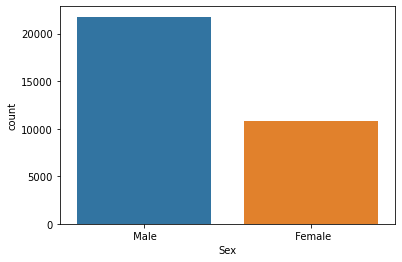

In [35]:
#Let's visualize the count of  Sex column.
sns.countplot(x="Sex",data=df)
print(df["Sex"].value_counts())

The male category is more compared to female category.

Bivariate Analysis:

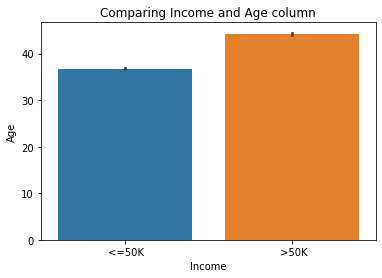

In [37]:
#comparing Income and Age column
plt.title("Comparing Income and Age column")
sns.barplot(x="Income",y="Age",data=df)
plt.show()

The persons with Income >50k is more according to Age column.  

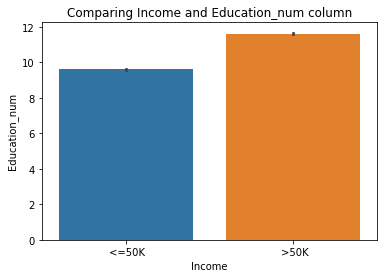

In [38]:
#comparing Income and Education_num column
plt.title("Comparing Income and Education_num column")
sns.barplot(x="Income",y="Education_num",data=df)
plt.show()

The persons with Income >50k is more according to Education_num column.

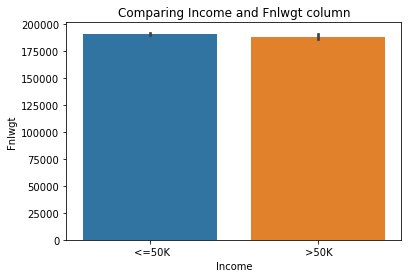

In [39]:
#comparing Income and Fnlwgt column
plt.title("Comparing Income and Fnlwgt column")
sns.barplot(x="Income",y="Fnlwgt",data=df)
plt.show()

Both income categories are  almost same according to Fnlwgt column.

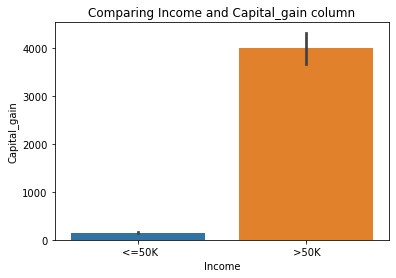

In [40]:
#comparing Income and Capital_gain column
plt.title("Comparing Income and Capital_gain column")
sns.barplot(x="Income",y="Capital_gain",data=df)
plt.show()

The persons with Income >50k is more according to Capital_gain column.

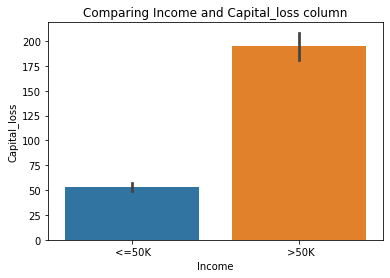

In [41]:
#comparing Income and Capital_loss column
plt.title("Comparing Income and Capital_loss column")
sns.barplot(x="Income",y="Capital_loss",data=df)
plt.show()

The persons with Income >50k is more according to Capital_loss column.

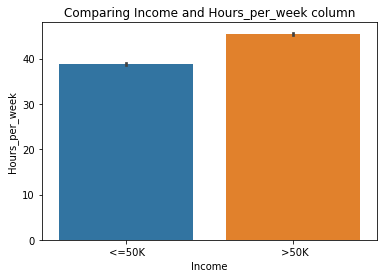

In [42]:
#comparing Income and Hours_per_week column
plt.title("Comparing Income and Hours_per_week column")
sns.barplot(x="Income",y="Hours_per_week",data=df)
plt.show()

The persons with Income >50k is more according to Hours_per_week column.

In [14]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
lab_encoder=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lab_encoder.fit_transform(df[i])
df        

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [15]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

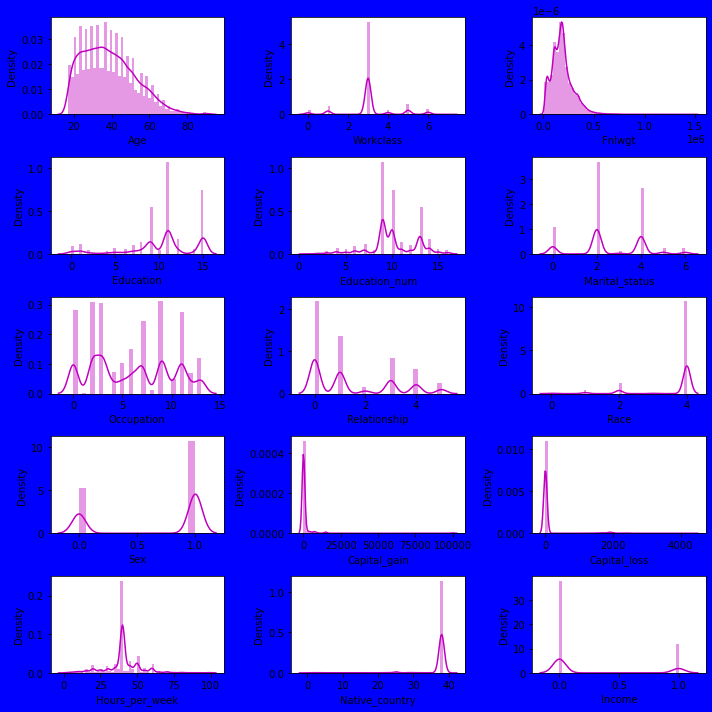

In [45]:
#let's visualize how the data has been distributed in all  the columns.
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
for column in df.columns:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
    plt.tight_layout()

The columns Fnlwgt,Capital_gain, Capital_loss is right skewed and Race, Native_country columns are left skewed.

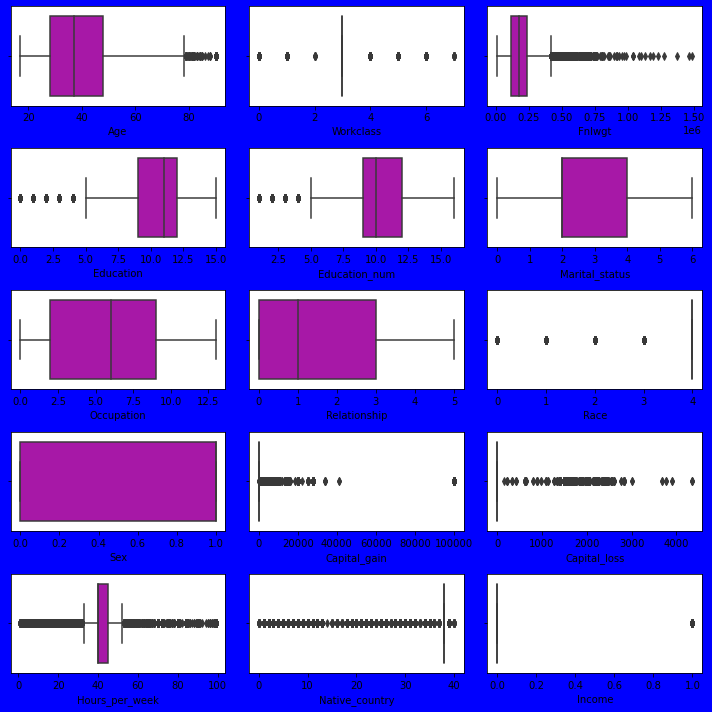

In [46]:
#let's visualize how the outliers present in all  the columns.
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
for column in df.columns:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
    plt.tight_layout()

The columns Age,Workclass,Fnlwgt, Education,Education_num,Race,Capital_gain,Capital_loss, Hours_per_week,Native_country,Income columns have outliers.

In [47]:
from scipy.stats import zscore

z_score=(zscore(df))
b=np.abs(z_score)
b

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.836961,1.670389,1.008703,0.335272,1.134817,0.405890,0.736996,0.900122,0.393692,0.703036,0.145969,0.216747,2.222450,0.263987,0.563389
1,0.042934,0.089435,0.245008,0.181506,0.420646,1.733664,0.240245,0.277868,0.393692,0.703036,0.145969,0.216747,0.035664,0.263987,0.563389
2,1.056935,0.089435,0.425720,2.402383,1.198377,0.405890,0.240245,0.900122,1.962450,0.703036,0.145969,0.216747,0.035664,0.263987,0.563389
3,0.776180,0.089435,1.408036,0.335272,1.134817,0.405890,0.753256,2.211146,1.962450,1.422403,0.145969,0.216747,0.035664,5.285462,0.563389
4,0.116259,0.089435,0.898091,0.439895,1.523683,0.405890,0.736996,2.211146,0.393692,1.422403,0.145969,0.216747,0.035664,0.263987,0.563389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.849505,0.089435,0.639647,0.852050,0.745951,0.405890,1.498383,2.211146,0.393692,1.422403,0.145969,0.216747,0.197648,0.263987,0.563389
32556,0.103715,0.089435,0.335469,0.181506,0.420646,0.405890,0.008130,0.900122,0.393692,0.703036,0.145969,0.216747,0.035664,0.263987,1.774973
32557,1.423558,0.089435,0.358812,0.181506,0.420646,2.249657,1.482123,1.588892,0.393692,1.422403,0.145969,0.216747,0.035664,0.263987,0.563389
32558,1.216128,0.089435,0.110897,0.181506,0.420646,0.921884,1.482123,0.966639,0.393692,0.703036,0.145969,0.216747,1.655506,0.263987,0.563389


In [48]:
#The data where the outliers are present
np.where(b>3)

(array([    3,     9,    10, ..., 32508, 32526, 32528], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

In [49]:
#Now removing the data above zscore
df1=df[(b<3).all(axis=1)]
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [50]:
print("Data loss percentage:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage: 14.774403737398572


Data loss percentage after removing outliers is 14.77%

In [16]:
#checking skewness in all the columns.
df.skew()

Age                0.557657
Workclass          0.066067
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.108962
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -4.192409
Income             1.211640
dtype: float64

skewness is present in  Fnlwgt,Education,Relationship,Race,Sex,Capital_gain, Capital_loss,Income,Native_country columns, as Income is target variable no need to remove skewness in that column and let us remove skewness in remaining columns.

In [17]:
#Let us remove skewness using cube root method
df['Fnlwgt']=np.cbrt(df["Fnlwgt"])
df["Education"]=np.cbrt(df["Education"])
df["Relationship"]=np.cbrt(df["Relationship"])
df["Race"]=np.cbrt(df["Race"])
df["Sex"]=np.cbrt(df["Sex"])
df["Capital_gain"]=np.cbrt(df["Capital_gain"])
df['Capital_loss']=np.cbrt(df["Capital_loss"])
df["Native_country"]=np.cbrt(df["Native_country"])


In [18]:
df.skew()

Age               0.557657
Workclass         0.066067
Fnlwgt           -0.163720
Education        -2.817651
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.108962
Relationship     -0.102138
Race             -4.746106
Sex              -0.719400
Capital_gain      4.098390
Capital_loss      4.335154
Hours_per_week    0.228752
Native_country   -5.425080
Income            1.211640
dtype: float64

still skewness is present in Education, Race,Capital_gain, Capital_loss, Native_country columns.

In [54]:
#correlation between Dependent variables and independent variable
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.038591,-0.067847,0.021668,0.036224,-0.266142,-0.008277,-0.325571,0.025202,0.088708,0.124529,0.052857,0.068515,-0.009012,0.234039
Workclass,0.038591,1.000000,-0.023732,0.000293,0.001880,-0.016964,0.009903,-0.063373,0.037374,0.068164,0.020916,-0.000650,0.034384,-0.003559,0.000394
Fnlwgt,-0.067847,-0.023732,1.000000,-0.026779,-0.040897,0.027430,0.000143,0.017273,0.032139,0.023012,-0.000765,-0.006170,-0.022800,-0.052271,-0.004533
Education,0.021668,0.000293,-0.026779,1.000000,0.420165,-0.051928,-0.024784,-0.039194,0.016511,-0.014847,0.041009,0.022359,0.082765,0.040111,0.106700
Education_num,0.036224,0.001880,-0.040897,0.420165,1.000000,-0.069196,0.084764,-0.096215,0.029541,0.012181,0.148258,0.078050,0.148426,0.065625,0.335299
Marital_status,-0.266142,-0.016964,0.027430,-0.051928,-0.069196,1.000000,0.022923,0.298589,-0.046561,-0.129425,-0.068250,-0.035579,-0.190433,-0.016693,-0.199187
Occupation,-0.008277,0.009903,0.000143,-0.024784,0.084764,0.022923,1.000000,-0.044107,-0.000733,0.057092,0.016699,0.011120,0.014776,-0.006436,0.046904
Relationship,-0.325571,-0.063373,0.017273,-0.039194,-0.096215,0.298589,-0.044107,1.000000,-0.091515,-0.614432,-0.116783,-0.073564,-0.269288,-0.008776,-0.366371
Race,0.025202,0.037374,0.032139,0.016511,0.029541,-0.046561,-0.000733,-0.091515,1.000000,0.064752,0.016784,0.018076,0.030443,0.082595,0.060959
Sex,0.088708,0.068164,0.023012,-0.014847,0.012181,-0.129425,0.057092,-0.614432,0.064752,1.000000,0.071827,0.043822,0.229190,0.001523,0.215984


This gives the correlation between dependent and independent features.

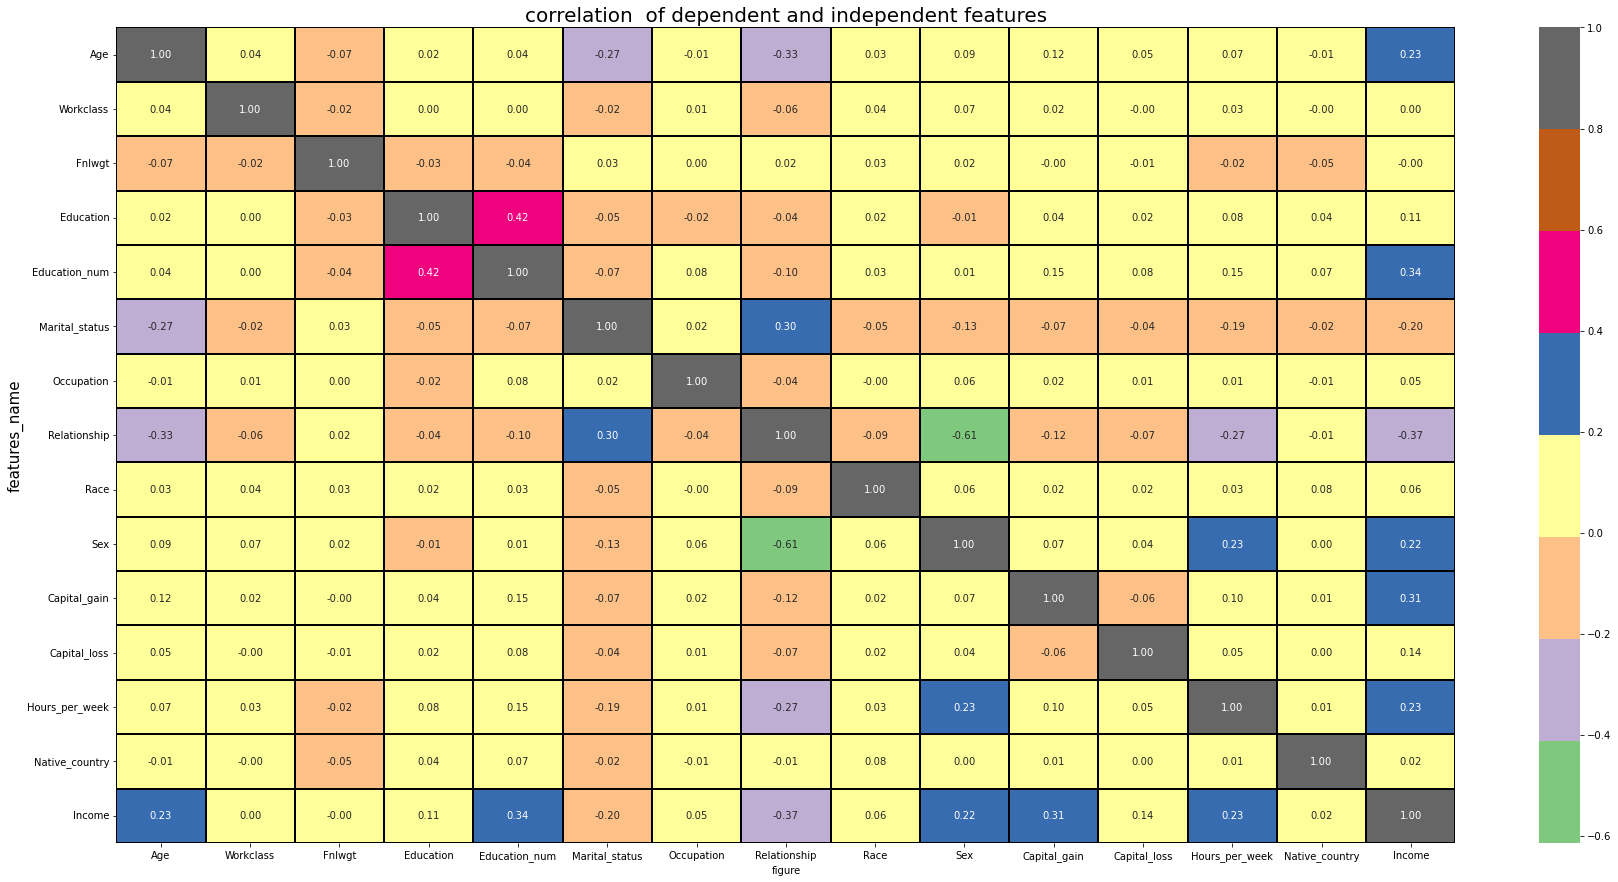

In [55]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Accent")
plt.xlabel('figure',fontsize=10)
plt.ylabel("features_name",fontsize=15)
plt.title("correlation  of dependent and independent features",fontsize=20)
plt.show()

In [19]:
df.corr()['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335299
Capital_gain      0.313931
Age               0.234039
Hours_per_week    0.229659
Sex               0.215984
Capital_loss      0.144047
Education         0.106700
Race              0.060959
Occupation        0.046904
Native_country    0.015647
Workclass         0.000394
Fnlwgt           -0.004533
Marital_status   -0.199187
Relationship     -0.366371
Name: Income, dtype: float64

we can observe the positive correlated features and negative correlated features also

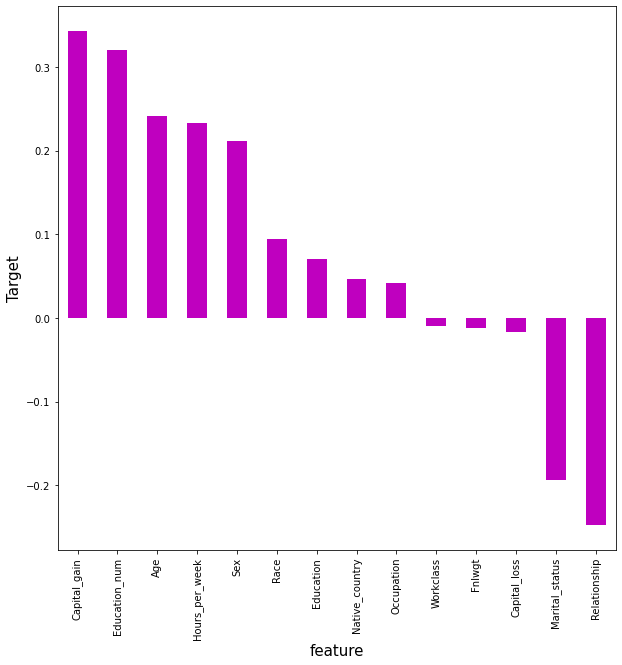

In [57]:
#visualizing the correlation between features and target
plt.figure(figsize=(10,10))
df1.corr()['Income'].sort_values(ascending=False).drop(["Income"]).plot(kind="bar",color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.show()

In [20]:
#Seperating Features and label
x=df.drop("Income",axis=1)
y=df["Income"]

In [21]:
x.shape

(32536, 14)

In [22]:
y.shape

(32536,)

In [23]:
y.value_counts()

0    24697
1     7839
Name: Income, dtype: int64

Feature scaling using RobustScaler:

In [24]:
from sklearn.preprocessing import RobustScaler
p=RobustScaler()
x=pd.DataFrame(p.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.65,2.0,-0.981017,-0.687365,1.000000,0.0,-0.428571,-0.693361,0.00000,0.0,0.000000,0.0,-5.4,0.000000
1,0.05,0.0,0.285990,0.000000,-0.333333,-1.0,-0.142857,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000
2,0.80,0.0,0.419629,-5.846722,-1.000000,0.0,-0.142857,-0.693361,-0.32748,0.0,0.000000,0.0,0.0,0.000000
3,-0.45,0.0,1.041826,-0.687365,1.000000,0.0,0.428571,0.492270,-0.32748,-1.0,0.000000,0.0,0.0,-1.774574
4,0.00,0.0,0.737750,0.312635,1.333333,0.0,-0.428571,0.492270,0.00000,-1.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,-0.50,0.0,0.568779,-1.485822,0.666667,0.0,0.857143,0.492270,0.00000,-1.0,0.000000,0.0,-0.4,0.000000
32532,0.15,0.0,-0.205720,0.000000,-0.333333,0.0,0.000000,-0.693361,0.00000,0.0,0.000000,0.0,0.0,0.000000
32533,1.05,0.0,-0.228035,0.000000,-0.333333,2.0,-0.857143,0.407281,0.00000,-1.0,0.000000,0.0,0.0,0.000000
32534,-0.75,0.0,0.181626,0.000000,-0.333333,1.0,-0.857143,0.306639,0.00000,0.0,0.000000,0.0,-4.0,0.000000


Checking Variance Inflation Factor:

In [25]:
#Finding variance inflation factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.212883,Age
1,1.011930,Workclass
2,1.018035,Fnlwgt
3,1.273303,Education
4,1.289742,Education_num
5,1.209935,Marital_status
6,1.016472,Occupation
7,1.437004,Relationship
8,1.092967,Race
9,1.370795,Sex


Here, multi collinearity is not present.so, we can move ahead for model building.

In [26]:
y.value_counts()

0    24697
1     7839
Name: Income, dtype: int64

Here,we can see that the data is not balanced, since it is a classification problem we will balance the data using Random OverSampling method

OverSampling the Data:

In [27]:
from imblearn.over_sampling import RandomOverSampler
R=RandomOverSampler()
x1,y1=R.fit_resample(x,y)

In [28]:
y1.value_counts()

0    24697
1    24697
Name: Income, dtype: int64

Now the data is balanced,we can build machine learning classification models.

Modelling:

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
#creating train test split.
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=200)

In [31]:
def m_score(name,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=name.predict(x_train)
        print("Training result")
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    else:
         if train==False:
            pred=name.predict(x_test)
            print("\n----Test Result----")
            print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
            print("confusion_matrix:\n\n",confusion_matrix(y_test,pred))
            print("\n Test classification report:\n\n",classification_report(y_test,pred,digits=2))


In [32]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [33]:
#Model initiation for RandomForestClassifier
name=RandomForestClassifier()
name.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
m_score(name,x_train,x_test,y_train,y_test,train=True)
m_score(name,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:92.89%
confusion_matrix:

 [[5438  701]
 [ 177 6033]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.97      0.89      0.93      6139
           1       0.90      0.97      0.93      6210

    accuracy                           0.93     12349
   macro avg       0.93      0.93      0.93     12349
weighted avg       0.93      0.93      0.93     12349



The accuracy score using RandomForestClassifier is 92.98%

Finding the best random state:

In [75]:
mAccuracy=0
mRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=i)
    pred=name.predict(x_test)
    Test_result=accuracy_score(y_test,pred)
    if Test_result>mAccuracy:
        mAccuracy=Test_result
        mRS=i
print("Best accuracy is",mAccuracy,"at random state",mRS)    

Best accuracy is 0.984776095230383 at random state 131


In [35]:
#checking cv score for RandomForestClassifier
score=cross_val_score(name,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score.mean())

[0.92721935 0.92873773 0.93926511 0.94311165 0.94270095]
0.9362069582134145


NameError: name 'pred' is not defined

In [77]:
#Model initiation for SupportVectorMachineClassifier
name1=SVC()
name1.fit(x_train,y_train)

SVC()

In [78]:
m_score(name1,x_train,x_test,y_train,y_test,train=True)
m_score(name1,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:80.26%

----Test Result----
Accuracy score:79.42%
confusion_matrix:

 [[4714 1451]
 [1090 5094]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.81      0.76      0.79      6165
           1       0.78      0.82      0.80      6184

    accuracy                           0.79     12349
   macro avg       0.80      0.79      0.79     12349
weighted avg       0.80      0.79      0.79     12349



The accuracy score using SVC is 79.42%

In [79]:
#checking cv score for SupportVectorMachineClassifier
score1=cross_val_score(name1,x1,y1)
print(score1)
print(score1.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score1.mean())

[0.8026116  0.79997976 0.80048588 0.79957486 0.80178174]
0.8008867654972608
Difference between Accuracy score and cross validation score is: 0.18089313570931465


In [80]:
#Model initiation for GradientBoostingClassifier
name2=GradientBoostingClassifier()
name2.fit(x_train,y_train)

GradientBoostingClassifier()

In [81]:
m_score(name2,x_train,x_test,y_train,y_test,train=True)
m_score(name2,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:84.21%

----Test Result----
Accuracy score:83.32%
confusion_matrix:

 [[4980 1185]
 [ 875 5309]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.85      0.81      0.83      6165
           1       0.82      0.86      0.84      6184

    accuracy                           0.83     12349
   macro avg       0.83      0.83      0.83     12349
weighted avg       0.83      0.83      0.83     12349



The accuracy using GradientBoostingClassifier is 83.32%

In [82]:
#checking cv score for GradientBoostingClassifier
score2=cross_val_score(name2,x1,y1)
print(score2)
print(score2.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score2.mean())

[0.83864764 0.83723049 0.83378885 0.84208928 0.83984612]
0.8383204746659114
Difference between Accuracy score and cross validation score is: 0.14345942654066401


In [83]:
#Model initiation for AdaBoostClassifier
name3=AdaBoostClassifier()
name3.fit(x_train,y_train)

AdaBoostClassifier()

In [84]:
m_score(name3,x_train,x_test,y_train,y_test,train=True)
m_score(name3,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:83.07%

----Test Result----
Accuracy score:82.37%
confusion_matrix:

 [[4971 1194]
 [ 983 5201]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.83      0.81      0.82      6165
           1       0.81      0.84      0.83      6184

    accuracy                           0.82     12349
   macro avg       0.82      0.82      0.82     12349
weighted avg       0.82      0.82      0.82     12349



The accuracy using AdaBoostClassifier is 82.37%

In [85]:
#checking cv score for AdaBoostClassifier
score3=cross_val_score(name3,x1,y1)
print(score3)
print(score3.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score3.mean())

[0.82397004 0.8283227  0.82265411 0.83014475 0.83275967]
0.8275702552822745
Difference between Accuracy score and cross validation score is: 0.15420964592430098


In [86]:
#Model initiation for DecisionTreeClassifier
name4=DecisionTreeClassifier()
name4.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
m_score(name4,x_train,x_test,y_train,y_test,train=True)
m_score(name4,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:91.14%
confusion_matrix:

 [[5286  879]
 [ 215 5969]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.96      0.86      0.91      6165
           1       0.87      0.97      0.92      6184

    accuracy                           0.91     12349
   macro avg       0.92      0.91      0.91     12349
weighted avg       0.92      0.91      0.91     12349



The accuracy using DecisionTreeClassifier is  91.14%

In [88]:
#checking cv score for DecisionTreeClassifier
score4=cross_val_score(name4,x1,y1)
print(score4)
print(score4.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score4.mean())

[0.90737929 0.91122583 0.92539731 0.93349529 0.93197003]
0.9218935513722931
Difference between Accuracy score and cross validation score is: 0.059886349834282315


In [36]:
#Model initiation for ExtraTreesClassifier
name5=ExtraTreesClassifier()
name5.fit(x_train,y_train)

ExtraTreesClassifier()

In [37]:
m_score(name5,x_train,x_test,y_train,y_test,train=True)
m_score(name5,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:100.00%

----Test Result----
Accuracy score:93.37%
confusion_matrix:

 [[5535  604]
 [ 215 5995]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.96      0.90      0.93      6139
           1       0.91      0.97      0.94      6210

    accuracy                           0.93     12349
   macro avg       0.94      0.93      0.93     12349
weighted avg       0.94      0.93      0.93     12349



The accuracy using ExtraTreeClassifier is 93.37%

In [38]:
#checking cv score for ExtraTreesClassifier
score5=cross_val_score(name5,x1,y1)
print(score5)
print(score5.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score5.mean())

[0.93440632 0.93501367 0.94918514 0.95374026 0.95171087]
0.9448112503466474


NameError: name 'pred' is not defined

In [92]:
#Model initiation for BaggingClassifier
name6=BaggingClassifier()
name6.fit(x_train,y_train)

BaggingClassifier()

In [93]:
m_score(name6,x_train,x_test,y_train,y_test,train=True)
m_score(name6,x_train,x_test,y_train,y_test,train=False)

Training result
Accuracy score:99.66%

----Test Result----
Accuracy score:92.23%
confusion_matrix:

 [[5446  719]
 [ 240 5944]]

 Test classification report:

               precision    recall  f1-score   support

           0       0.96      0.88      0.92      6165
           1       0.89      0.96      0.93      6184

    accuracy                           0.92     12349
   macro avg       0.92      0.92      0.92     12349
weighted avg       0.92      0.92      0.92     12349



The accuracy using Bagging classifier is  92.23%

In [94]:
#checking cv score for BaggingClassifier
score6=cross_val_score(name6,x1,y1)
print(score6)
print(score6.mean())
print("Difference between Accuracy score and cross validation score is:",accuracy_score(y_test,pred)-score6.mean())

[0.92175321 0.92600466 0.93845531 0.94270675 0.94108119]
0.934000224338304
Difference between Accuracy score and cross validation score is: 0.04777967686827145


ExtraTreesClassifier is our best model,as the difference between accuracy score and cv score is least.

ExtraTreesClassifier is our best model and we will do Hyper parameter tuning for this model.

Hyper Parameter Tuning:

In [39]:
#for ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
parameters={'criterion':['gini','entropy'],
             'random_state':[10,15],
             'max_depth':range(5,10),
             'n_jobs':range(-2,1),
             'n_estimators':range(50,100)}

In [41]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [42]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 10),
                         'n_estimators': range(50, 100), 'n_jobs': range(-2, 1),
                         'random_state': [10, 15]})

In [43]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'n_estimators': 69,
 'n_jobs': -2,
 'random_state': 10}

In [44]:
Final_model=ExtraTreesClassifier(criterion='gini',max_depth=9,n_estimators=69,n_jobs=-2,random_state=10)
Final_model.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=9, n_estimators=69, n_jobs=-2, random_state=10)

In [45]:
y_test

41114    1
3035     0
38792    1
27203    1
34878    1
        ..
23405    1
39305    1
11835    0
47169    1
8757     1
Name: Income, Length: 12349, dtype: int32

In [46]:
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import roc_curve
y_pred=Final_model.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0])

In [47]:
accuracy=accuracy_score(y_test,y_pred)*100
print("accuracy",accuracy,"%")

accuracy 81.31832537047534 %


In [48]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[4526, 1613],
       [ 694, 5516]], dtype=int64)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      6139
           1       0.77      0.89      0.83      6210

    accuracy                           0.81     12349
   macro avg       0.82      0.81      0.81     12349
weighted avg       0.82      0.81      0.81     12349



Threshold= [2 1 0]
True positive rate= [0.         0.88824477 1.        ]
False positive Rate= [0.         0.26274638 1.        ]


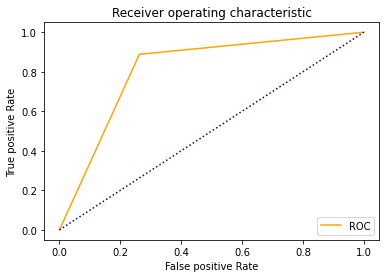

In [50]:
#roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
print('Threshold=',thresholds)
print('True positive rate=',tpr)
print('False positive Rate=',fpr)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [51]:
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print("AUC_score:",'\n',auc_score*100,"%")

AUC_score: 
 81.2749195437213 %


Here we plotted the ROC curve for the final model.The accuracy or AUC_score for the best model is 81.27%

In [53]:
#saving the model
import joblib
joblib.dump(Final_model,"Census_Income_Project.pkl")


['Census_Income_Project.pkl']

In [54]:
#predicting the saved model
model=joblib.load("Census_Income_Project.pkl")
#prediction
prediction=model.predict(x_test)
prediction

array([1, 0, 1, ..., 1, 1, 0])

In [55]:
g=np.array(y_test)
df2=pd.DataFrame()
df2['predicted']=prediction
df2["original"]=g
df2    

,predicted,original
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
12344,0,1
12345,1,1
12346,1,0
12347,1,1


Predicted is the Income whether a person makes over $50K a year based on given details in the dataset.

Threshold= [2 1 0]
True positive rate= [0.         0.88824477 1.        ]
False positive Rate= [0.         0.26274638 1.        ]


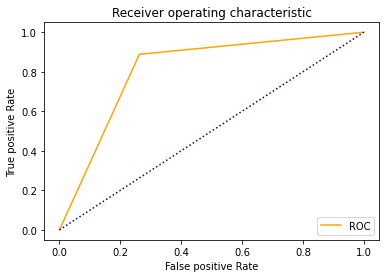

In [56]:
#roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
print('Threshold=',thresholds)
print('True positive rate=',tpr)
print('False positive Rate=',fpr)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='dotted')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [57]:
auc_score=roc_auc_score(y_test,Final_model.predict(x_test))
print("AUC_score:",'\n',auc_score*100,"%")

AUC_score: 
 81.2749195437213 %


we have plotted the ROC curve for the final model and the AUC score for the best model is  81.27%